In [3]:
from mace.calculators import mace_mp
from ase import build

from ase.md import Langevin
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from ase import units
from ase import Atoms
from ase.build import bulk
from ase.visualize import view
import numpy as np
import matplotlib.pyplot as plt
from ase.build import add_vacuum
from ase.optimize import LBFGS, BFGS
from ase import Atom

from ase.io.trajectory import Trajectory
from ase.md import Langevin, Bussi
from ase import io
from ase.visualize.plot import plot_atoms


plt.rcParams.update({
    "font.family": "serif",       
    "font.size": 12,              
    "axes.labelsize": 14,         
    "axes.titlesize": 16,         
    "xtick.labelsize": 12,        
    "ytick.labelsize": 12,       
    "legend.fontsize": 12,      
    "text.usetex": True       
})


### Single Na ion

In [2]:
mg_na_traj_norelax100000_500 = io.read("trajectories/mg_na_omat_flipped_norelax_100000.traj", index="500:")
mgo_na_traj_norelax100000_500 = io.read("trajectories/mgo_na_omat_flipped_norelax_100000.traj", index="500:")
mgoh_na_traj_norelax100000_500 = io.read("trajectories/mgoh_na_omat_flipped_norelax_100000.traj", index="500:")


### Na intercalation top view

In [ ]:
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
from ase import Atoms

def plot_mxene_with_graphene(frame, filepath):

    cell = frame.cell
    a1, a2 = cell[0][:2], cell[1][:2]

    parallelogram = np.array([
        [0, 0],
        a1,
        a1 + a2,
        a2,
        [0, 0]
    ])
    
    plt.plot(parallelogram[:, 0], parallelogram[:, 1], 'k-', linewidth=1.5)

    mxene_atoms = Atoms([atom for atom in frame if atom.tag in [0, 1, 2, 3] and atom.symbol != 'Na'])

    positions_mxene = mxene_atoms.get_positions()[:, :2]
    tags_mxene = mxene_atoms.get_tags()

    color_map_mxene = {0: "lightgrey", 1: "red", 2: "grey", 3: "red"}
    atom_colors_mxene = [color_map_mxene[tag] for tag in tags_mxene]

    for i, pos in enumerate(positions_mxene):
        size = 500 if tags_mxene[i] == 0 else (150 if tags_mxene[i] == 3 else 200)
        if tags_mxene[i] != 1:
            plt.scatter(pos[0], pos[1], s=size, c=atom_colors_mxene[i], edgecolors="black", zorder=2)
        

    bond_cutoff_mxene = 2.5
    dist_matrix_mxene = squareform(pdist(positions_mxene))

    for i in range(len(positions_mxene)):
        for j in range(i + 1, len(positions_mxene)):
            if dist_matrix_mxene[i, j] < bond_cutoff_mxene and tags_mxene[i] != 1:
                plt.plot([positions_mxene[i, 0], positions_mxene[j, 0]],
                         [positions_mxene[i, 1], positions_mxene[j, 1]],
                         'k-', linewidth=1, zorder=1)
                
    na_atoms = [atom for atom in frame if atom.symbol == 'Na']
    for na_atom in na_atoms:
        plt.scatter(na_atom.position[0], na_atom.position[1], s=500, c='darkviolet', edgecolors='black', zorder=2.5)
    
    graphene_atoms = Atoms([atom for atom in frame if atom.tag in [10, 11, 12]])
    positions_graphene = graphene_atoms.get_positions()[:, :2]

    for atom in graphene_atoms:
        if atom.tag == 11:
            plt.scatter(atom.position[0], atom.position[1],
                        s=150, c='red', 
                        edgecolors='black', zorder=2.5)
        elif atom.tag == 12:
            plt.scatter(atom.position[0], atom.position[1],
                        s=150, c='white', 
                        edgecolors='black', zorder=2.4)
    
    
    
    bond_cutoff_graphene = 1.6
    dist_matrix_graphene = squareform(pdist(positions_graphene))

    bond_color = '#808080'
    edge_color = 'black'
    bond_width = 1.5
    edge_width = 3

    symbols_graphene = graphene_atoms.get_chemical_symbols()

    for i in range(len(positions_graphene)):
        for j in range(i + 1, len(positions_graphene)):
            if dist_matrix_graphene[i, j] < bond_cutoff_graphene:
                
                atom_pair = {symbols_graphene[i], symbols_graphene[j]}

                if atom_pair == {'O', 'H'}:
                    plt.plot([positions_graphene[i, 0], positions_graphene[j, 0]],
                            [positions_graphene[i, 1], positions_graphene[j, 1]],
                            color='black', linewidth=1.0, zorder=2.3)
                    
                elif 'H' not in atom_pair:
                    plt.plot([positions_graphene[i, 0], positions_graphene[j, 0]],
                            [positions_graphene[i, 1], positions_graphene[j, 1]],
                            color='black', linewidth=2.5, zorder=2.3)

                    plt.plot([positions_graphene[i, 0], positions_graphene[j, 0]],
                            [positions_graphene[i, 1], positions_graphene[j, 1]],
                            color='#808080', linewidth=1.5, zorder=3)



    plt.axis("equal")
    plt.axis("off")
    if filepath:
        plt.savefig(f"figures/{filepath}.pdf")
    plt.show()


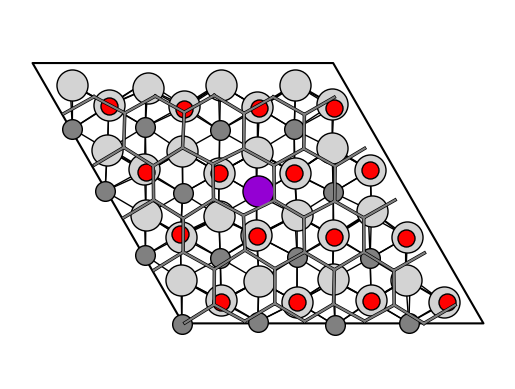

In [211]:
plot_mxene_with_graphene(mg_na_traj_norelax100000_500[-1], filepath="topview_mg")


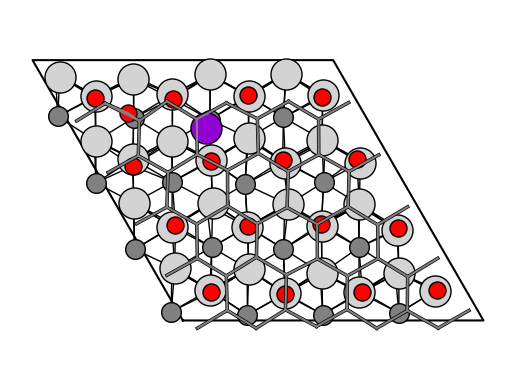

In [212]:
plot_mxene_with_graphene(mgo_na_traj_norelax100000_500[-1], filepath="topview_mgo")



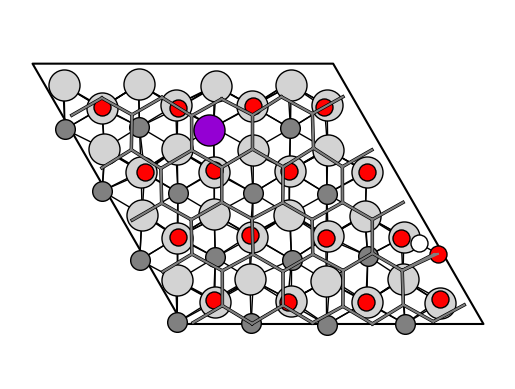

In [213]:
plot_mxene_with_graphene(mgoh_na_traj_norelax100000_500[-1], filepath="topview_mgoh")


### Na intercalation side view

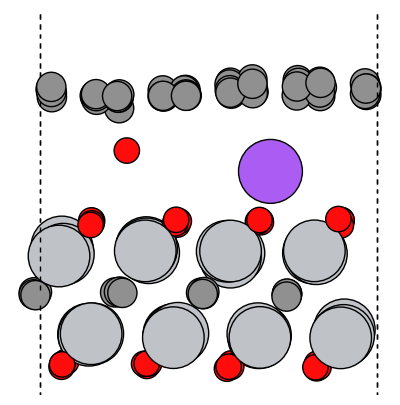

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_atoms(mgo_na_traj_norelax100000_500[0], ax, radii=0.6, rotation=('90x, 210y, 180z'))


plt.axis("off")
#plt.xlim(7, 20)
plt.ylim(8,20)
plt.savefig("figures/mgo_na_diagram.pdf")
plt.show()

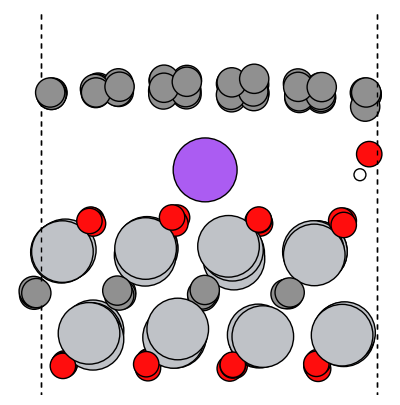

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_atoms(mgoh_na_traj_norelax100000_500[0], ax, radii=0.6, rotation=('90x, 210y, 180z'))


plt.axis("off")
#plt.xlim(7, 20)
plt.ylim(8,20)
plt.savefig("figures/mgoh_na_diagram.pdf")
plt.show()

### Many Na ions

In [17]:
mg_na_many_flip_norelax_traj_500_100000 = io.read("trajectories/mg_na_many_omat_flipped_norelax_100000.traj", index="500:")
mgo_na_many_flip_norelax_traj_500_100000 = io.read("trajectories/mgo_na_many_omat_flipped_norelax_100000.traj", index="500:")
mgoh_na_many_flip_norelax_traj_500_100000 = io.read("trajectories/mgoh_na_many_omat_flipped_norelax_100000.traj", index="500:")

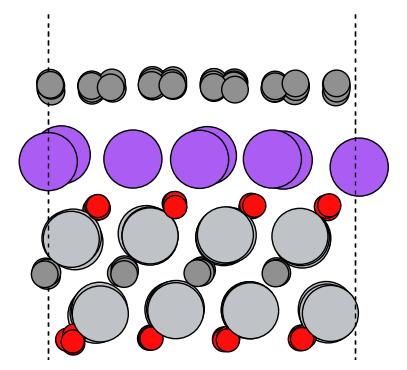

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_atoms(mg_na_many_flip_norelax_traj_500_100000[0], ax, radii=0.6, rotation=('90x, 210y, 180z')) 


plt.axis("off")
#plt.xlim(7, 20)
plt.ylim(8,20)
plt.savefig("figures/mg_na_many_diagram.pdf")
plt.show()

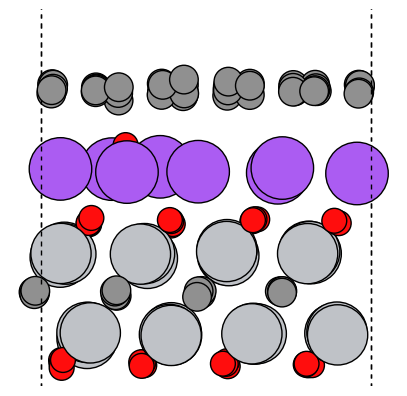

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_atoms(mgo_na_many_flip_norelax_traj_500_100000[0], ax, radii=0.6, rotation=('90x, 210y, 180z'))


plt.axis("off")
#plt.xlim(7, 20)
plt.ylim(8,20)
plt.savefig("figures/mgo_na_many_diagram.pdf")
plt.show()

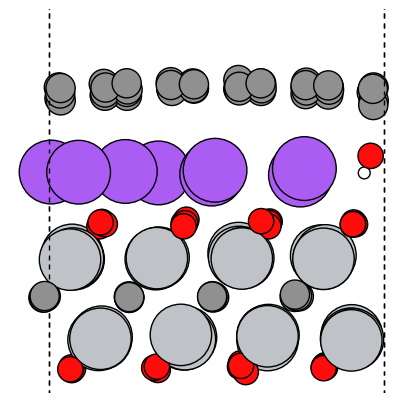

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

plot_atoms(mgoh_na_many_flip_norelax_traj_500_100000[0], ax, radii=0.6, rotation=('90x, 210y, 180z'))


plt.axis("off")
#plt.xlim(7, 20)
plt.ylim(8,20)
plt.savefig("figures/mgoh_na_many_diagram.pdf")
plt.show()

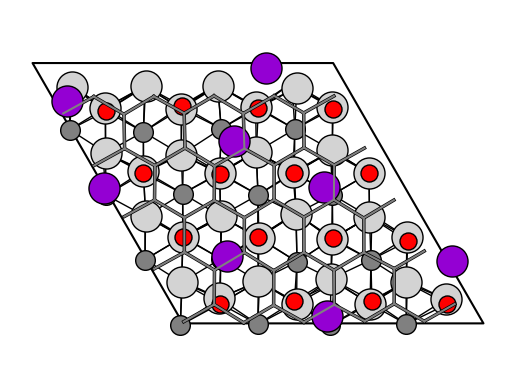

In [ ]:
plot_mxene_with_graphene(mg_na_many_flip_norelax_traj_500_100000[0], filepath="topview_mg_many")


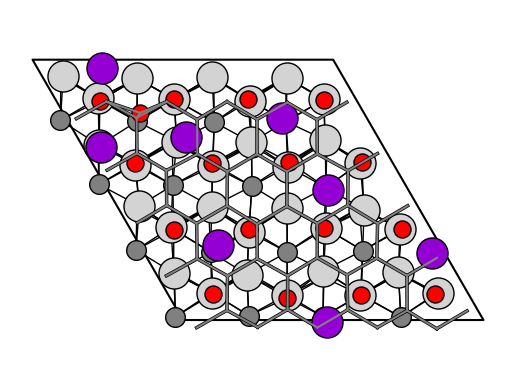

In [ ]:
plot_mxene_with_graphene(mgo_na_many_flip_norelax_traj_500_100000[0], filepath="topview_mgo_many")


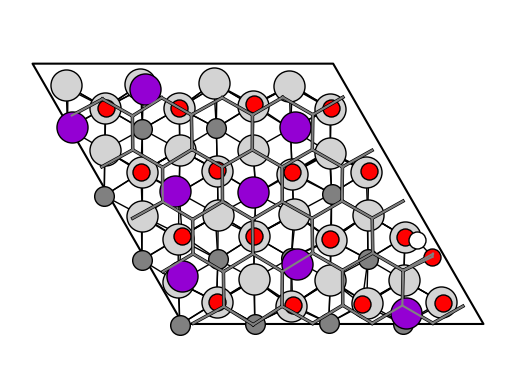

In [ ]:
plot_mxene_with_graphene(mgoh_na_many_flip_norelax_traj_500_100000[0], filepath="topview_mgoh_many")
